In [1]:
from scipy import io as sio
import numpy as np 
from matplotlib import pyplot as plt
from scipy import signal
import math
%matplotlib notebook

In [2]:
data = sio.loadmat(open('/home/baran/Downloads/pat62_highGammaDataToy.mat', 'rb'))

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Sep 21 20:39:25 2018',
 '__version__': '1.0',
 '__globals__': [],
 'noisyChans': array([[ 45,  46,  48,  49,  50, 121, 161, 162, 185, 186]], dtype=uint8),
 'resp': array([[0.69794389, 0.7498949 , 0.80045712, ..., 0.64528034, 0.95148015,
         1.32262404],
        [0.72551131, 0.70774206, 0.79279282, ..., 0.59631059, 0.89716507,
         1.5991927 ],
        [0.70521951, 0.72931001, 0.7447257 , ..., 0.63190077, 0.91971953,
         1.46870657],
        ...,
        [0.60647337, 0.83516964, 0.76856606, ..., 0.59734746, 0.86397358,
         0.70728887],
        [0.61039782, 0.84367133, 0.78450651, ..., 0.60976064, 0.85555306,
         0.7186687 ],
        [0.60569475, 0.86669503, 0.80704201, ..., 0.60574127, 0.80334334,
         0.67278239]]),
 'respRaw': array([[ 66026.953125,  75808.53125 ,  74624.234375, ..., -21320.359375,
          20903.125   ,   1136.453125],
        [ 66010.296875,  75801.71875 ,  74624.26

In [4]:
resp = data['resp']
respRaw = data['respRaw']
noisyChans = data['noisyChans']

In [5]:
time = np.arange(0,192.72,1/1200.0)

<IPython.core.display.Javascript object>


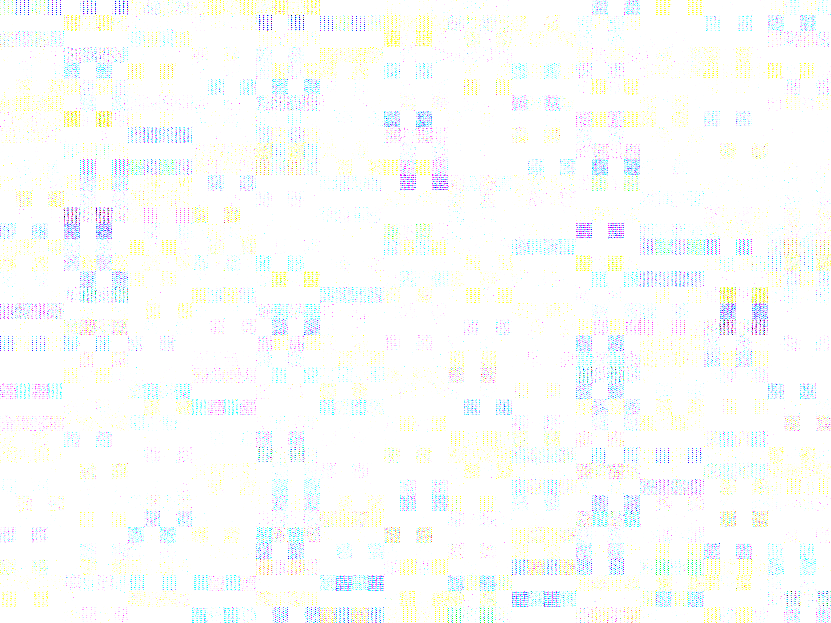

In [6]:
%matplotlib notebook
plt.figure()
plt.plot(resp[:,0])
plt.plot(resp[:,1])
plt.show()

<IPython.core.display.Javascript object>


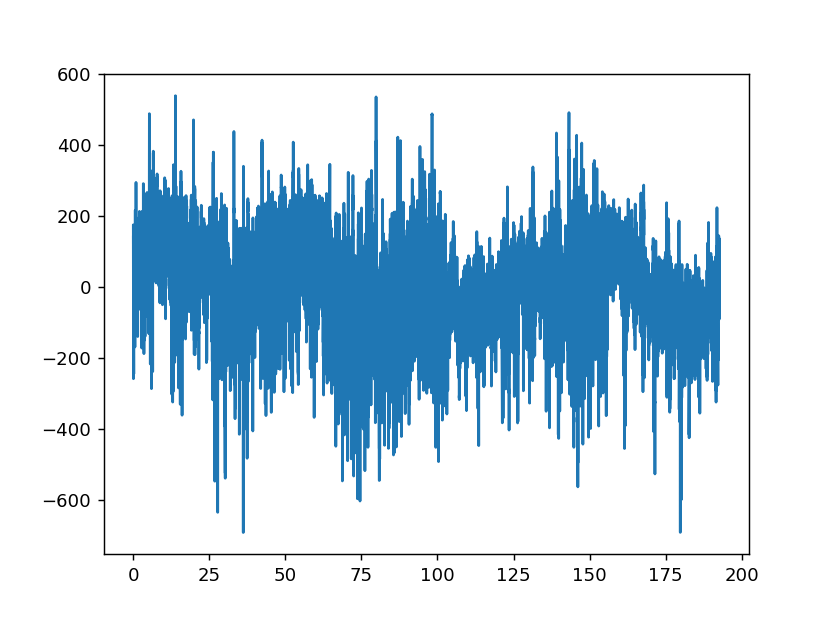

In [7]:
plt.figure()
plt.plot(time,respRaw[:,1]-np.median(respRaw[:,1]))
plt.show()

In [8]:
freq_bounds = np.arange(70,150,5)

In [9]:
filtered = np.zeros((len(freq_bounds)-1, len(respRaw[:,1])))
for band in range(len(freq_bounds)-1):
    b,a = signal.iirfilter(4, [freq_bounds[band]/600, freq_bounds[band+1]/600], btype='bandpass')
    filtered[band] = signal.filtfilt(b,a,respRaw[:,1])

<IPython.core.display.Javascript object>


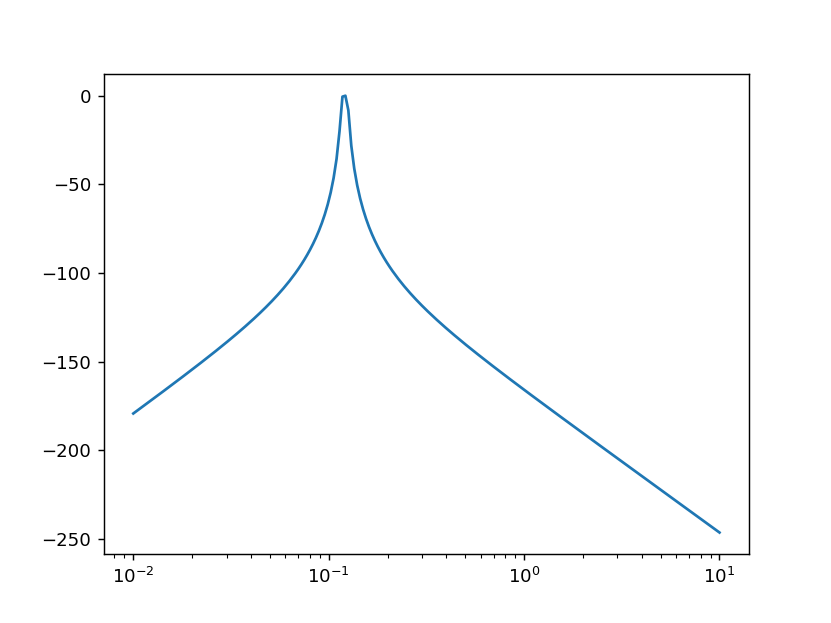

In [10]:
b,a = signal.iirfilter(4, [70/600, 75/600], btype='bandpass', analog=True)
w,h = signal.freqs(b,a)

plt.figure()
plt.semilogx(w, 20*np.log10(abs(h)))
plt.show()

<IPython.core.display.Javascript object>


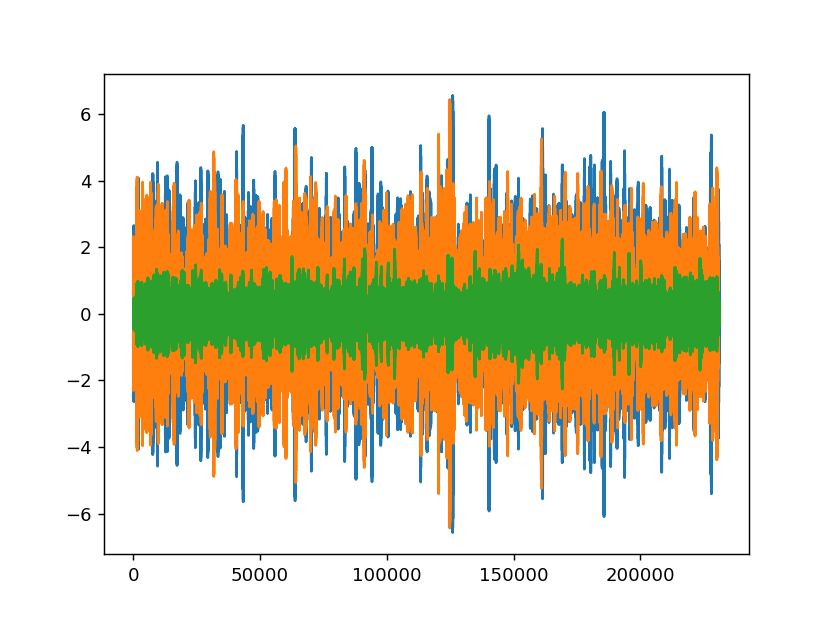

In [11]:
plt.figure()
plt.plot(filtered[0])
plt.plot(filtered[1])
plt.plot(filtered[-1])
plt.show()

In [12]:
b,a = signal.iirfilter(3, [70/600, 150/600], btype='bandpass')
broadband_filtered = signal.filtfilt(b,a,respRaw[:,1])

<IPython.core.display.Javascript object>


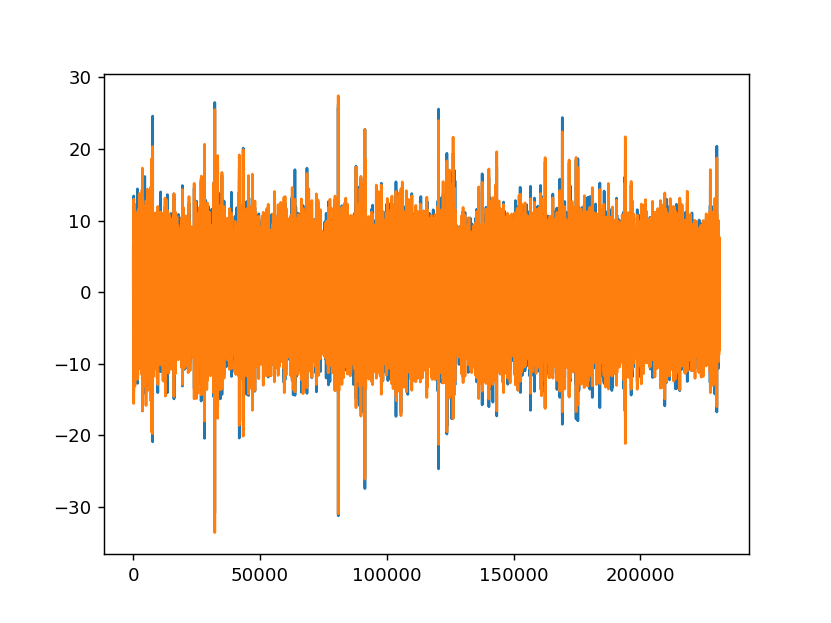

In [13]:
plt.figure()
plt.plot(np.sum(filtered, 0))
plt.plot(broadband_filtered)
plt.show()

In [14]:
from scipy import stats
stats.pearsonr(np.sum(filtered,0), broadband_filtered)

(0.8703825719405298, 0.0)

<IPython.core.display.Javascript object>


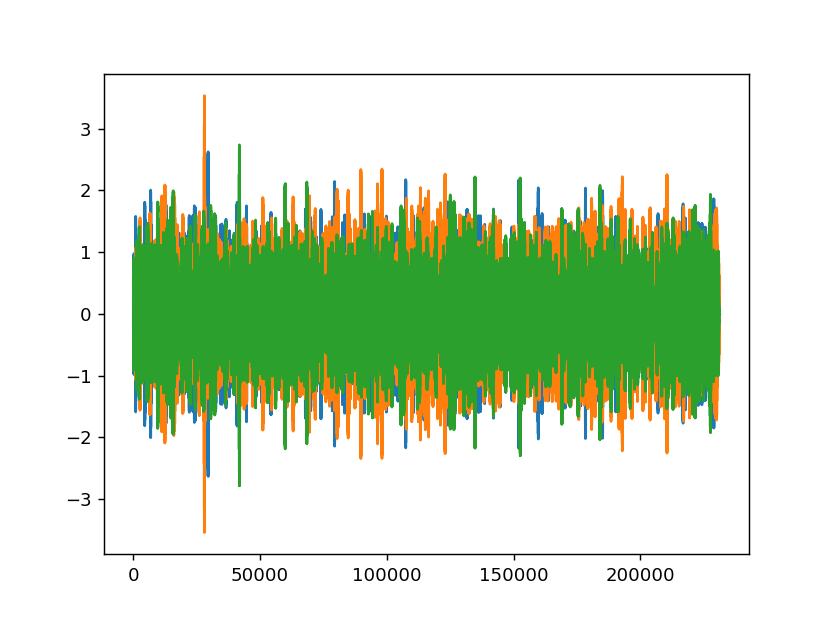

In [15]:
plt.figure()
plt.plot(filtered[11])
plt.plot(filtered[10])
plt.plot(filtered[12])
plt.show()

In [16]:
analytical = np.zeros((len(filtered),len(filtered[0])))
for band in range(len(filtered)):
    analytical[band] = np.abs(signal.hilbert(filtered[band]))

In [17]:
f,t,Zxx = signal.stft(respRaw[:,1],1200,nperseg=500)

<IPython.core.display.Javascript object>


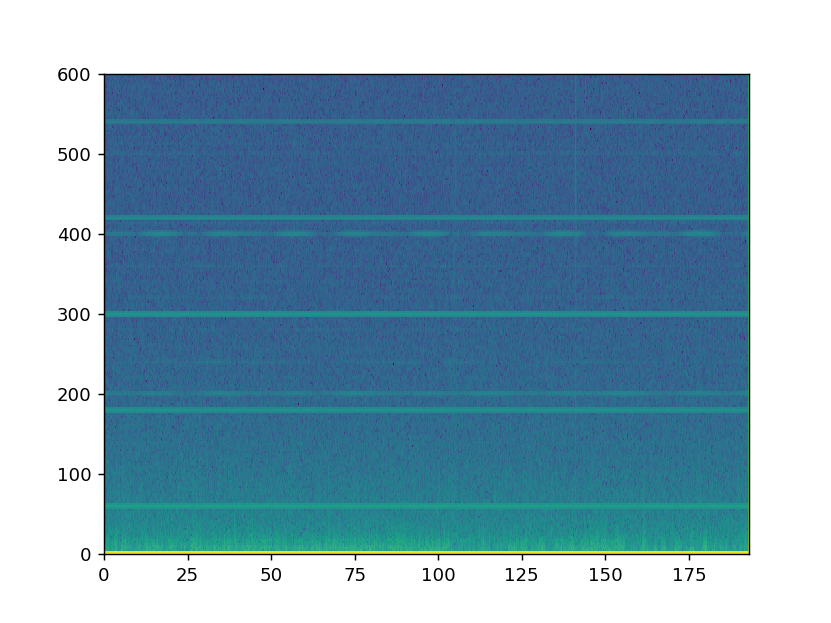

In [18]:
plt.figure()
plt.pcolormesh(t,f,np.log10(np.abs(Zxx)))
plt.show()

<IPython.core.display.Javascript object>


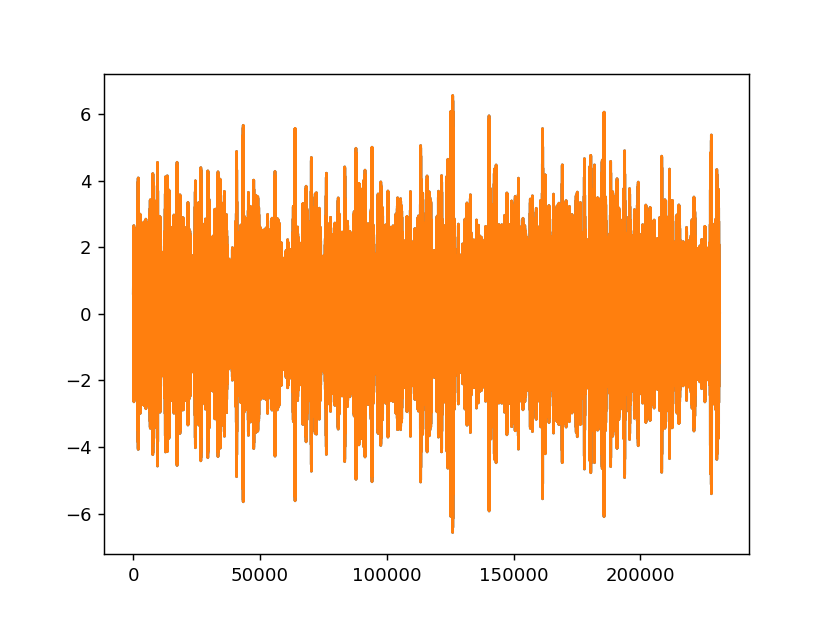

In [19]:
plt.figure()
plt.plot(filtered[0])
plt.plot(filtered[0] - np.median(filtered[0]))
plt.show()

<IPython.core.display.Javascript object>


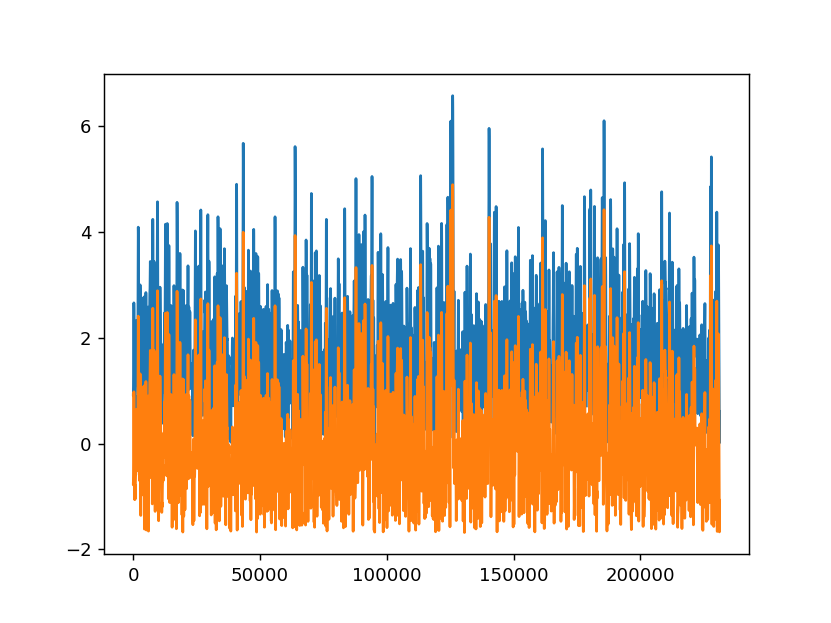

In [20]:
plt.figure()
plt.plot(analytical[0])
plt.plot(analytical[0] - np.median(analytical[0]))
plt.show()

In [21]:
analytical_referenced = np.zeros((len(analytical), len(analytical[0])))
for band in range(len(analytical)):
    analytical_referenced[band] = analytical[band] - np.median(analytical[band])

In [22]:
z = np.mean(analytical, 0)
y = signal.decimate(z, 12)

In [23]:
x = np.delete(y, np.arange(0,100))
w = np.delete(x, np.arange(19072,19172))

<IPython.core.display.Javascript object>


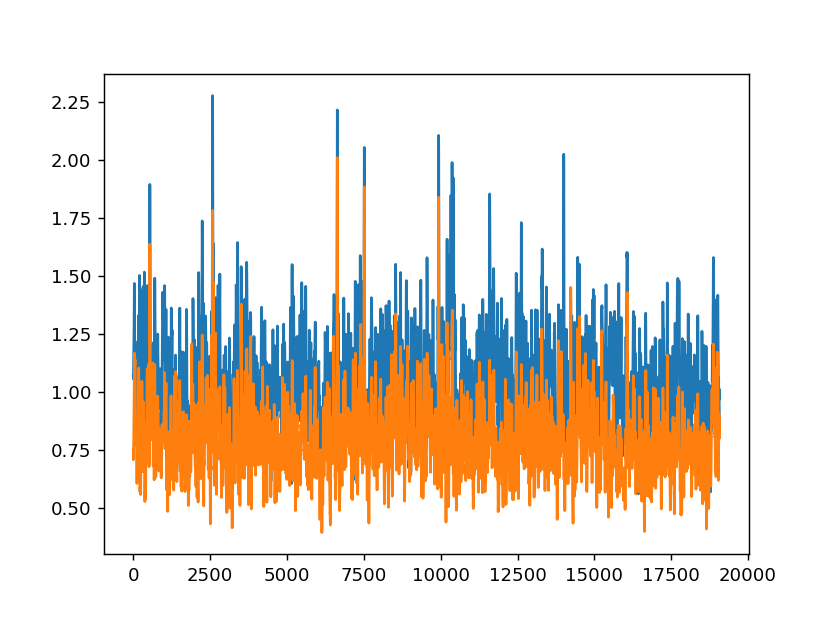

In [24]:
plt.figure()
plt.plot(w)
plt.plot(resp[:,1])
plt.show()

In [25]:
stats.pearsonr(w, resp[:,1]) 

(0.7255410033515037, 0.0)

In [26]:
import pycwt
wave, scales, freqs, coi, ffft, fftfreqs = pycwt.cwt(respRaw[:,1], 1/1200.)

In [27]:
power = np.abs(wave) ** 2

<IPython.core.display.Javascript object>


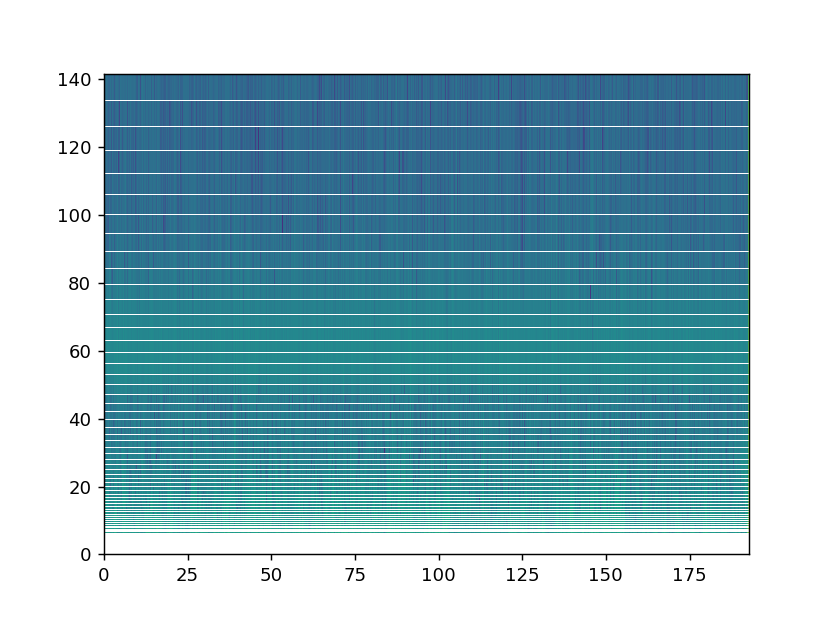

In [28]:
plt.figure()
plt.pcolormesh(time, freqs[25:], np.log10(power[25:,:]))
plt.show()

In [29]:
notch_filt1 = signal.iirnotch(60/600, 30)
notch_filt2 = signal.iirnotch(120/600, 30)
notch_filt3 = signal.iirnotch(180/600, 30)
respRaw_notch_filt = signal.filtfilt(notch_filt1[0], notch_filt1[1], respRaw[:,1])
respRaw_notch_filt = signal.filtfilt(notch_filt2[0], notch_filt2[1], respRaw_notch_filt)
respRaw_notch_filt = signal.filtfilt(notch_filt3[0], notch_filt3[1], respRaw_notch_filt)

<IPython.core.display.Javascript object>


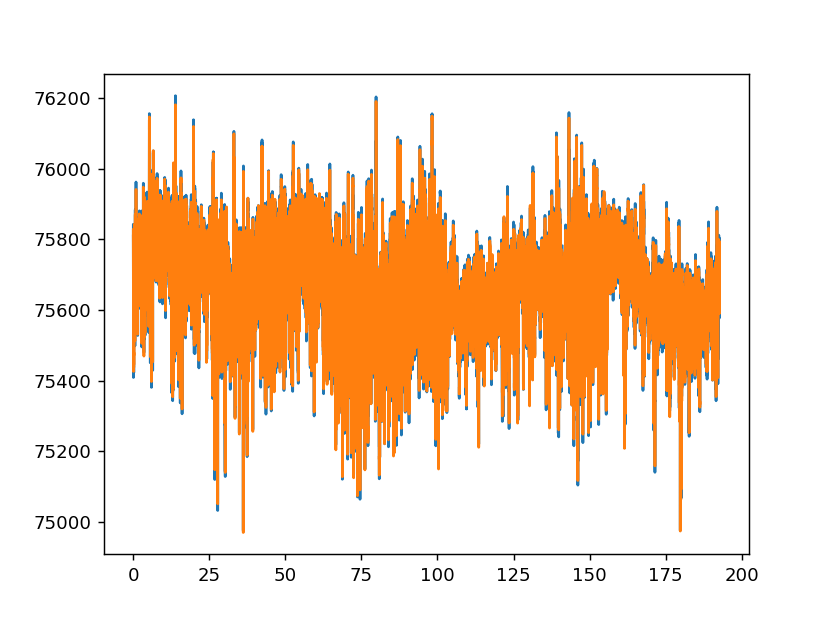

In [30]:
plt.figure()
plt.plot(time, respRaw[:,1])
plt.plot(time, respRaw_notch_filt)
plt.show()

In [31]:
wave, scales, freqs, coi, ffft, fftfreqs = pycwt.cwt((respRaw_notch_filt-np.median(respRaw_notch_filt)), 1/1200.)

In [32]:
power = np.abs(wave) ** 2

<IPython.core.display.Javascript object>


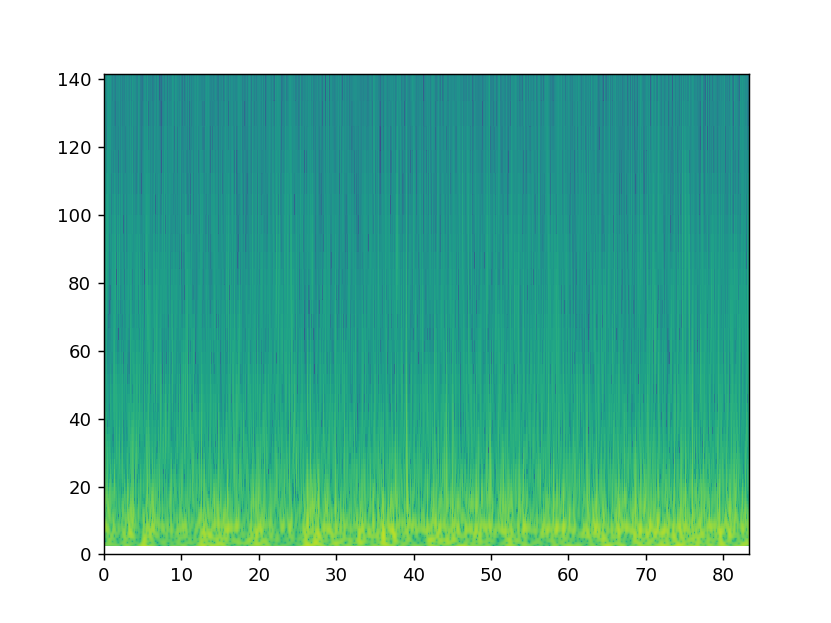

In [33]:
plt.figure()
plt.pcolormesh(time[0:100000], freqs[25:], np.log10(power[25:,0:100000]))
plt.show()